<a href="https://colab.research.google.com/github/Rohan-Patil-007/CODSOFT/blob/main/Titanic_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Dataset and displaying the dataset

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv',index_col=0)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Calculations of the missing values in the dataset and figuring out which imputation stratergy should be done

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


# df.describe()

This function describe what imputation stratergies should be applied to fill the missing values.Through the mean, median and mode the best imputation stratergy can be identified.

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Filling the missing values

In [ ]:
print(df['Age'].median())
df['Age']=df['Age'].fillna(df['Age'].median())

28.0


In [ ]:
# Fill Embarked values
print(df['Embarked'].value_counts())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().index[0])

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
# Fill Sex values
df['Sex'] =df['Sex'].map({'male' :0 , 'female':1})

In [ ]:
# Total Family Size
df['FamilySize']= df['SibSp'] + df['Parch']

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [ ]:
# dropping the columns which are not usefull
df = df.drop(columns=['Name','Ticket','Cabin'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,False,True
2,1,1,1,38.0,1,0,71.2833,1,False,False
3,1,3,1,26.0,0,0,7.9250,0,False,True
4,1,1,1,35.0,1,0,53.1000,1,False,True
5,0,3,0,35.0,0,0,8.0500,0,False,True


# Data Visualization

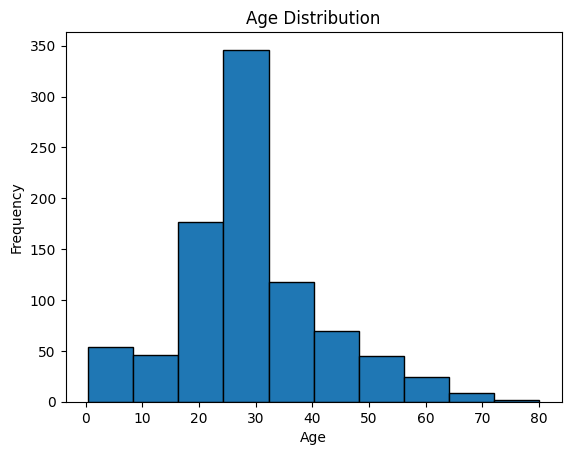

In [ ]:
# Age Distribution
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

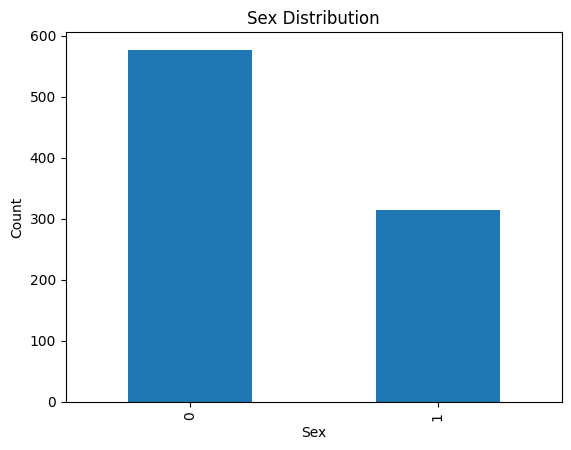

In [ ]:
# Sex Distribution
df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


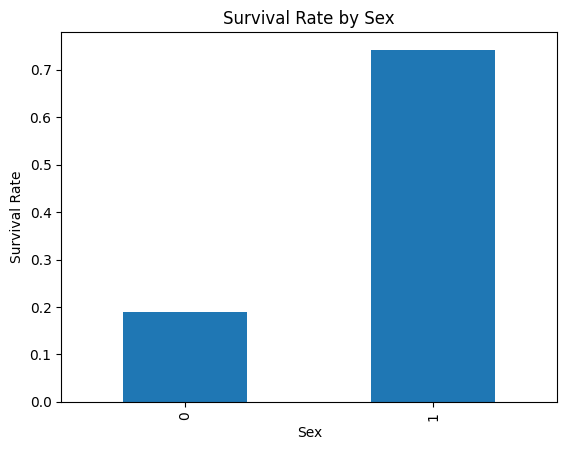

In [ ]:
# Survival Rate by Sex
survival_sex = df.groupby('Sex')['Survived'].mean()
survival_sex.plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Splitting the Dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the Logistic regression for prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

# Checking the Accuracy of the trained model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Sample DataFrame for the prediction

In [ ]:
sample_data = pd.DataFrame([
     {
         'Pclass': 3,
         'Sex': 0,          # male
         'Age': 25.0,
         'SibSp': 0,
         'Parch': 0,
         'Fare': 7.25,
         'FamilySize': 1,
         'Embarked_Q': 0,
         'Embarked_S': 1,
      }
     ])

prediction = model.predict(sample_data)
print("Predicted class (0 = Did not survive, 1 = Survived):", prediction[0])

Predicted class (0 = Did not survive, 1 = Survived): 0


In [ ]:
sample_data = pd.DataFrame([{
    'Pclass': 1,           # First class
    'Sex': 1,              # female
    'Age': 30.0,
    'SibSp': 1,            # Traveling with 1 sibling/spouse
    'Parch': 0,
    'Fare': 80.0,
    'FamilySize': 2,
    'Embarked_Q': 0,
    'Embarked_S': 1,
}])

# Predict
prediction = model.predict(sample_data)
print("Predicted class (0 = Did not survive, 1 = Survived):", prediction[0])


Predicted class (0 = Did not survive, 1 = Survived): 1
